In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [3]:
df = pd.read_csv("./csvfiles/mldata/titanic_train.csv")

# 데이터 전처리하기
## 시각화를 통해 기본특성 살펴보기
## 필요한 컬럼 선택/※NULL값처리/문자->숫자데이터

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<BarContainer object of 12 artists>

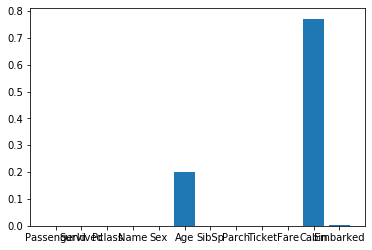

In [6]:
plt.bar(df.columns, height=df.isnull().sum()/len(df))

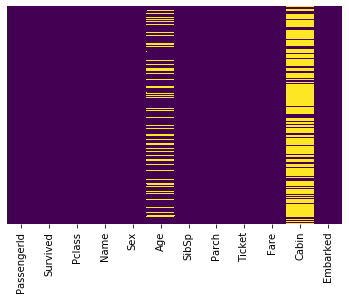

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

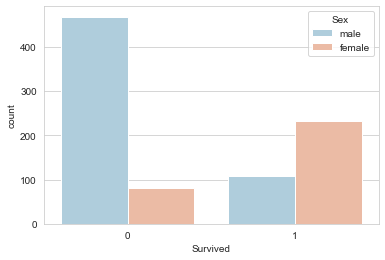

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r')

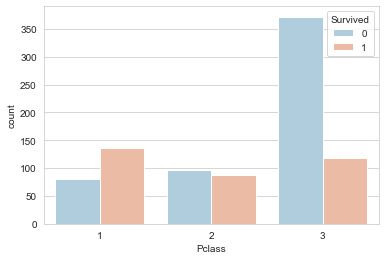

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=df, hue='Survived', palette='RdBu_r')

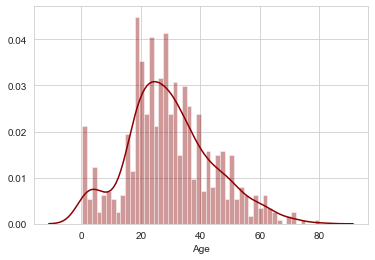

In [10]:
sns.distplot(df['Age'].dropna(), bins=50, color='darkred')

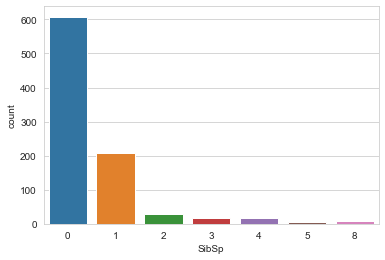

In [11]:
sns.countplot(x='SibSp', data=df) #동반자 수

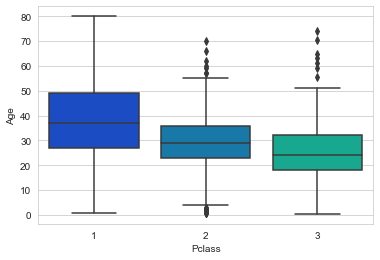

In [12]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter') # 클래스별 연령대

In [13]:
# cabin컬럼은 삭제
df.drop('Cabin', axis=1, inplace=True)

In [14]:
# age의 null값을 그 사람이 속한 pclass의 평균나이로 채우기
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
age =[]
for i in zip(df['Pclass'],df['Age']):
    c = i[0]
    a = i[1]
    if str(a)=='nan':
        if c==1:
            age.append(38)
        elif c==2:
            age.append(29)
        elif c==3:
            age.append(25)
    else:
        age.append(a)
df['Age'] = age

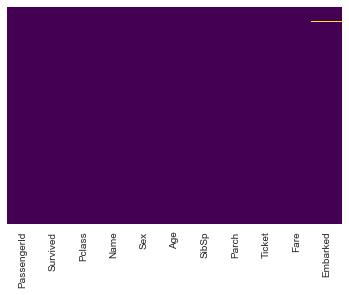

In [16]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [17]:
df.dropna(inplace=True)

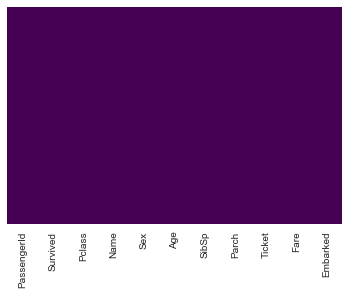

In [18]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# .get_dummies()
## 문자데이터를 숫자데이터(범주)로 전환

In [20]:
y = df['Survived']
x = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Sex']]

In [21]:
pd.get_dummies(x).head()

,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0
2,3,26.0,0,0,0,0,1,1,0
3,1,35.0,1,0,0,0,1,1,0
4,3,35.0,0,0,0,0,1,0,1


In [22]:
# drop_first=True 컬럼의 수를 줄일 수 있다. 둘중하나가 0이면 나머지 하나는 1이므로
# 셋중 두개가 0이면 나머지 하나가 1이된다.
x = pd.get_dummies(x, drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,0,1,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,1,0
3,1,35.0,1,0,0,1,0
4,3,35.0,0,0,0,1,1


# 데이터 분리/학습/예측

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=77)

In [24]:
log.fit(x_train,y_train)
predictions = log.predict(x_test)
np.mean(y_test.values == predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8370786516853933

# 모델평가

### confusion_matrix의 결과
### [pp(정답을 정답), fp(오답을 정답)]
### [pf(정답을 오답), ff(오답을 오답)]

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[90,  7],
       [22, 59]], dtype=int64)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.89      0.73      0.80        81

    accuracy                           0.84       178
   macro avg       0.85      0.83      0.83       178
weighted avg       0.84      0.84      0.83       178



# 학습한 모델을 저장후 재사용하기

In [28]:
import pickle
filename = 'log_titanic_model.sav'
pickle.dump(log, open(filename, 'wb'))
saved_logmodel = pickle.load(open(filename, 'rb'))
saved_logmodel.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [30]:
print(log.coef_)
print(log.intercept_)

[[-0.95335186 -0.02424961 -0.20061606 -0.06454687  0.02568084 -0.36695725
  -2.31107216]]
[4.09120943]


In [32]:
coef_df = pd.DataFrame(log.coef_, index=['Co_efficient'], columns=x.columns)
codf = coef_df.stack().unstack(level=0)
codf

,Co_efficient
Pclass,-0.953352
Age,-0.024250
SibSp,-0.200616
Parch,-0.064547
Embarked_Q,0.025681
Embarked_S,-0.366957
Sex_male,-2.311072


# codf 해석
### Pclass 와 반비례관계 => 1등석이 3등석보다 생존률이 높음
### Age와 반비례관계 => 젊을수록 생존률 높음
### SibSp와 반비례 관계 => 혼자 탄 사람이 배우자/형제와 같이 탄 사람보다 생존률 높음
### Parch와 반비례 관계 => 혼자 탄 사람이 아이/부모와 같이 탄 사람보다 생존률 높음
### Embarked_Q와 정비례 관계 => Queenstown에서 탄 승객의 생존률이 높음
### Sex_male과 반비례 관계 => 여성이 남성보다 생존률이 높음

# ====================================================
# ======================================

# 1. 데이터 선택&분리

In [33]:
df = pd.read_csv("./csvfiles/mldata/advertising.csv")

In [34]:
x = df.drop(['Ad Topic Line', 'City','Country', 'Timestamp','Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=77)

# 학습&예측

In [36]:
log.fit(x_train,y_train)
predictions = log.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 평가

In [37]:
confusion_matrix(y_test, predictions)

array([[98,  8],
       [ 8, 86]], dtype=int64)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.91      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [40]:
np.mean(y_test.values == predictions)

0.92

In [41]:
log.score(x_test, y_test)

0.92

In [48]:
print('mean_squared_error : ',metrics.mean_squared_error(y_test, predictions))
print('Root mean_squared_error : ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE : ',metrics.mean_absolute_error(y_test, predictions))

mean_squared_error :  0.08
Root mean_squared_error :  0.282842712474619
MAE :  0.08


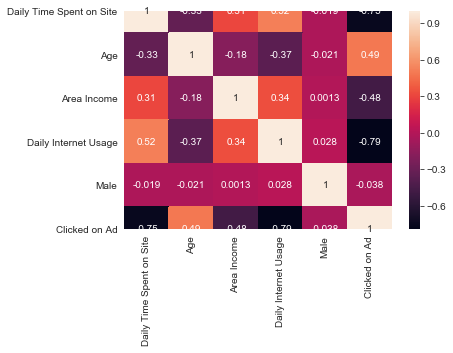

In [43]:
sns.heatmap(df.corr(), annot=True)

In [44]:
print(log.coef_)
print(log.intercept_)

[[-5.79007061e-02  2.58288453e-01 -2.36536017e-05 -2.23978722e-02
   2.11341122e-02]]
[0.10735247]


In [45]:
coef_df = pd.DataFrame(log.coef_, index=['Co_efficient'], columns=x.columns)
codf = coef_df.stack().unstack(level=0)
codf

,Co_efficient
Daily Time Spent on Site,-0.057901
Age,0.258288
Area Income,-0.000024
Daily Internet Usage,-0.022398
Male,0.021134


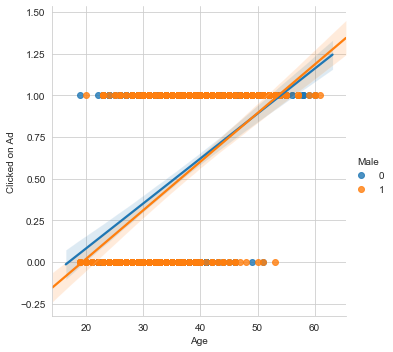

In [46]:
sns.lmplot(x='Age', y='Clicked on Ad', hue='Male',data=df)

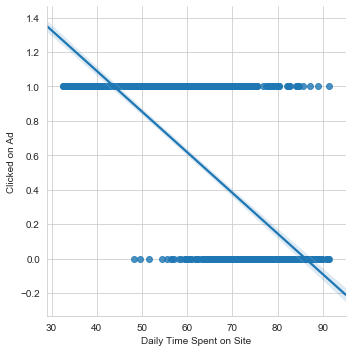

In [47]:
sns.lmplot(x='Daily Time Spent on Site', y='Clicked on Ad', data=df)

# 회원의 광고클릭 가능성
# y = -x1 * 0.05 + x2 * 0.25 + x3 * 0.00 - x4 * 0.02 + x5 * 0.02 + 0.1
# 회원의 광고클릭 가능성은 회원의 나이가 많을 수록 높아지고
# 일일 사이트 사용량이나 인터네 사용량에 비례해서는 낮아진다